# Ejemplo de motivación Análisis Multivariado (AM)

¿Cómo podemos modelar el riesgo de que un asegurado presente una reclamación, considerando factores como su edad, historial de conducción y tipo de vehículo?, ¿cómo cómo se puede identificar los factores que más influyen en la siniestralidad de un seguro de vida?

**¿Qué es el análisis multivariado y por qué es relevante para la actuaría?**

<details>
<summary>  </summary>

El análisis multivariado es una rama de la estadística que se enfoca en el estudio y análisis simultáneo de múltiples variables para comprender sus relaciones y patrones. A diferencia del análisis univariado o bivariado, el análisis multivariado aborda escenarios más complejos donde las variables interactúan entre sí y no pueden estudiarse de manera aislada.
</details>


**¿Qué implica el AM?**
<details>
<summary>  </summary>

1.  **Relaciones entre variables**: Identificar cómo las variables están correlacionadas o influyen entre sí.
</details>

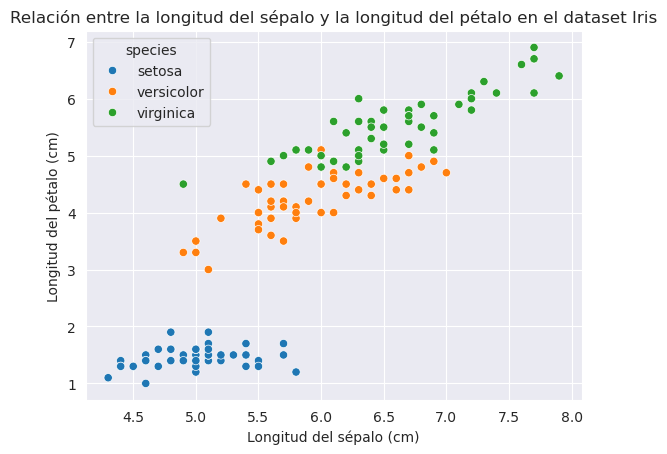

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset iris
iris = sns.load_dataset('iris')

# Crear un scatter plot para mostrar la relación entre la longitud del sépalo y la longitud del pétalo
# `hue` se usa para colorear los puntos según la especie de flor
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.title('Relación entre la longitud del sépalo y la longitud del pétalo en el dataset Iris')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Longitud del pétalo (cm)')
plt.show()

<details>
<summary>  </summary>

2. **Reducción de dimensionalidad**: Simplificar conjuntos de datos complejos conservando la mayor cantidad de información posible (p. ej., con Análisis de Componentes Principales, PCA).
</details>

<details>
<summary>  </summary>

3. **Clasificación y predicción**: Usar modelos como regresión logística multivariada o análisis discriminante para categorizar y predecir resultados.
</details>

**¿Por qué es relevante para la actuaría?**
<details>
<summary>  </summary>

1. **Modelos de riesgo complejos**: En la gestión de riesgos, como en seguros o finanzas, los riesgos no actúan de manera aislada. Por ejemplo, la probabilidad de pérdida financiera puede depender de múltiples factores, como la edad, ingresos y estado de salud.

2. **Priorización de variables**: Permite identificar cuáles variables tienen mayor impacto en fenómenos como siniestralidad, mortalidad o precios de activos.

3. **Dependencias entre eventos**: En seguros, los eventos pueden estar correlacionados (p. ej., un desastre natural puede generar múltiples reclamaciones). Técnicas como el análisis de correlaciones ayudan a modelar estas dependencias.

4. **Eficiencia en la toma de decisiones**: Permite a los actuarios crear modelos predictivos robustos para optimizar primas, calcular reservas y analizar escenarios.

5. **Reducción de incertidumbre**: Técnicas multivariadas como Monte Carlo multivariante o análisis bayesiano ayudan a simular escenarios y reducir la incertidumbre asociada a decisiones financieras.
</details>

## Presentación del dataset: UFC
https://www.kaggle.com/datasets/mdabbert/ultimate-ufc-dataset

Como ejemplo de motivación, vamos a explorar un conjunto de datos que proviene del mundo de las artes marciales mixtas (MMA): el Ultimate Fighting Championship (UFC).  

Aunque a primera vista pueda parecer lejano al campo de la actuaría, este dataset nos ofrece una oportunidad única para aplicar conceptos y técnicas de análisis multivariado en un contexto dinámico y con un conjunto de datos rico en variables.

**¿Qué información contiene este dataset?**

Este conjunto de datos registra información detallada sobre miles de peleas de la UFC, incluyendo:

**1. Características de los peleadores:**

*   **`RedFighter`, `BlueFighter`:**  Nombre del peleador en la esquina roja y en la esquina azul. En la UFC, la esquina roja suele estar reservada para el peleador considerado favorito.
*   **`RedAge`, `BlueAge`:** Edad de cada peleador.
*   **`RedHeightCms`, `BlueHeightCms`:** Altura de cada peleador en centímetros.
*   **`RedReachCms`, `BlueReachCms`:**  Alcance de los brazos de cada peleador en centímetros, una medida importante en deportes de combate.
*   **`RedWeightLbs`, `BlueWeightLbs`:** Peso de cada peleador en libras.
*   **`RedStance`, `BlueStance`:** Postura de combate de cada peleador (Ortodoxo, Southpaw, etc.).
*   **`RedCountry`, `BlueCountry`:** País de origen de cada peleador.

**2. Historial de peleas:**

*   **`RedWins`, `RedLosses`, `RedDraws`:** Número de victorias, derrotas y empates del peleador en la esquina roja antes de la pelea en cuestión.
*   **`BlueWins`, `BlueLosses`, `BlueDraws`:**  Lo mismo para el peleador en la esquina azul.
*   **`RedCurrentWinStreak`, `BlueCurrentWinStreak`:**  Racha actual de victorias consecutivas de cada peleador.
*   **`RedCurrentLoseStreak`, `BlueCurrentLoseStreak`:** Racha actual de derrotas consecutivas de cada peleador.
*   **`RedAvgSigStrLanded`, `BlueAvgSigStrLanded`:** Promedio de golpes significativos conectados por minuto de cada peleador en peleas anteriores.
*   **`RedAvgSubAtt`, `BlueAvgSubAtt`:** Promedio de intentos de sumisión por 15 minutos de cada peleador en peleas anteriores.
*   **`RedAvgTDPct`, `BlueAvgTDPct`:** Porcentaje de derribos exitosos de cada peleador en peleas anteriores.
*   **`RedTotalRoundsFought`, `BlueTotalRoundsFought`:** Número total de rounds que ha peleado cada peleador en su carrera.
*   **`RedTotalTitleBouts`, `BlueTotalTitleBouts`:** Número de peleas por el título que ha tenido cada peleador.

**3.  Resultados de la pelea:**

*   **`Winner`:** Indica quién ganó la pelea (Red o Blue).
*   **`Finish`:** Método de finalización de la pelea (KO, TKO, Sumisión, Decisión).
*   **`FinishRound`:** Round en el que terminó la pelea.
*   **`FinishRoundTime`:** Tiempo transcurrido en el round en que terminó la pelea.
*   **`TotalFightTimeSecs`:** Duración total de la pelea en segundos.

**4.  Apuestas:**

*   **`RedOdds`, `BlueOdds`:** Momios de las apuestas para cada peleador.
*   **`RedDecOdds`, `BlueDecOdds`:** Momios de las apuestas para que cada peleador gane por decisión.


**Conexión con la actuaría:**

Aunque este conjunto de datos se centra en las peleas de la UFC, podemos utilizarlo para ilustrar conceptos actuariales como:

*   **Análisis de riesgo:** Identificar los factores que influyen en la probabilidad de ganar o perder una pelea, similar a cómo se evalúa el riesgo de un asegurado.
*   **Predicción de resultados:**  Construir modelos para predecir el resultado de una pelea, como se hace para predecir la probabilidad de una reclamación.
*   **Segmentación:**  Agrupar peleadores con características similares, lo que se asemeja a la segmentación de clientes en seguros.


En las siguientes secciones, exploraremos este conjunto de datos con mayor profundidad, utilizando técnicas de análisis multivariado para descubrir patrones ocultos y obtener información valiosa.



🔴⚠️ **Antes de construir modelos complejos, es fundamental comprender los datos con los que estamos trabajando.  A este proceso se le llama Análisis Exploratorio de Datos (EDA), y es una etapa crucial en cualquier proyecto de data science, incluyendo los que se realizan en actuaría.**

## Análisis exploratorio de datos (EDA)

El análisis exploratorio de datos (EDA) es como una investigación inicial donde nos familiarizamos con los datos.  

Es crucial para:

**Descubrir patrones y tendencias**: ¿Hay alguna relación entre la edad de un peleador y su probabilidad de ganar?

**Identificar valores atípicos o errores**: ¿Hay algún peleador con una altura o un alcance inusual?

**Formular hipótesis**: ¿Influye la postura de combate en el resultado de la pelea?

**Preparar los datos para el análisis**: ¿Hay valores faltantes que debemos manejar? En este curso, utilizaremos el EDA como base para aplicar técnicas de análisis multivariado más avanzadas.

## Análisis descriptivo

El análisis descriptivo es una parte fundamental del EDA. Nos permite obtener un resumen de las características principales de los datos, como la media, la desviación estándar, la distribución de las variables, y las relaciones entre ellas.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset de la UFC
ufc_data = pd.read_csv('ufc-master.csv')

ufc_data.head(10)

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Alexandre Pantoja,Kai Asakura,-250.0,215.0,40.0000,215.0000,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Rear Naked Choke,2.0,2:05,425.0,300.0,800.0,150.0,2500.0,400.0,350.0
1,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,47.6190,295.0000,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,NaN,5.0,5:00,1500.0,250.0,650.0,180.0,3000.0,240.0,700.0
2,Ciryl Gane,Alexander Volkov,-380.0,300.0,26.3158,300.0000,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,NaN,3.0,5:00,900.0,-160.0,450.0,1100.0,3000.0,350.0,1100.0
3,Bryce Mitchell,Kron Gracie,-950.0,625.0,10.5263,625.0000,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Elbows,3.0,0:39,639.0,-200.0,1100.0,380.0,1400.0,500.0,4000.0
4,Nate Landwehr,Dooho Choi,-130.0,110.0,76.9231,110.0000,2024-12-07,"Las Vegas, Nevada, USA",USA,Blue,...,Elbows,3.0,3:21,801.0,275.0,550.0,500.0,700.0,300.0,250.0
5,Dominick Reyes,Anthony Smith,-380.0,300.0,26.3158,300.0000,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Punches,2.0,4:46,586.0,250.0,750.0,1200.0,1200.0,-125.0,800.0
6,Vicente Luque,Themba Gorimbo,-650.0,-162.0,15.3846,61.7284,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Anaconda Choke,1.0,0:52,52.0,450.0,130.0,450.0,900.0,600.0,450.0
7,Movsar Evloev,Aljamain Sterling,-238.0,195.0,42.0168,195.0000,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,NaN,3.0,5:00,900.0,-135.0,275.0,1600.0,1100.0,550.0,1600.0
8,Randy Brown,Bryan Battle,150.0,-180.0,150.0000,55.5556,2024-12-07,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,400.0,185.0,1000.0,550.0,450.0,300.0
9,Chris Weidman,Eryk Anders,-112.0,-108.0,89.2857,92.5926,2024-12-07,"Las Vegas, Nevada, USA",USA,Blue,...,Punches,2.0,4:51,591.0,150.0,200.0,1000.0,1800.0,650.0,380.0


In [3]:
# Calcular la cantidad de valores faltantes por columna
missing_values = ufc_data.isna().sum()

# Filtrar las variables con valores faltantes
missing_values_filtered = missing_values[missing_values > 0]

missing_values_filtered

RedOdds                   227
BlueOdds                  226
RedExpectedValue          227
BlueExpectedValue         226
BlueAvgSigStrLanded       930
BlueAvgSigStrPct          765
BlueAvgSubAtt             832
BlueAvgTDLanded           833
BlueAvgTDPct              842
BlueStance                  3
RedAvgSigStrLanded        455
RedAvgSigStrPct           357
RedAvgSubAtt              357
RedAvgTDLanded            357
RedAvgTDPct               367
EmptyArena               1486
BMatchWCRank             5328
RMatchWCRank             4749
RWFlyweightRank          6432
RWFeatherweightRank      6519
RWStrawweightRank        6382
RWBantamweightRank       6374
RHeavyweightRank         6342
RLightHeavyweightRank    6344
RMiddleweightRank        6346
RWelterweightRank        6337
RLightweightRank         6344
RFeatherweightRank       6351
RBantamweightRank        6347
RFlyweightRank           6340
RPFPRank                 6275
BWFlyweightRank          6455
BWFeatherweightRank      6527
BWStrawwei

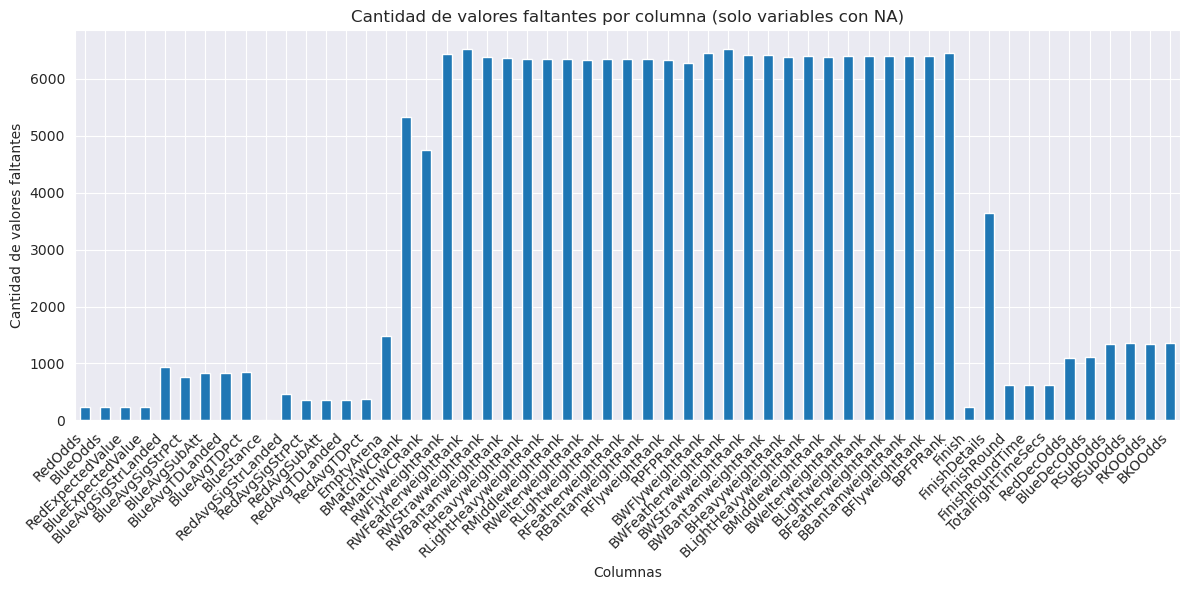

In [4]:
# Crear un gráfico de barras de los valores faltantes (solo para las variables con NA)
plt.figure(figsize=(12, 6))
missing_values_filtered.plot(kind='bar')
plt.title('Cantidad de valores faltantes por columna (solo variables con NA)')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores faltantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Análisis univariado



In [5]:
# 1. Estadísticas descriptivas de la edad de los peleadores
print("Estadísticas descriptivas de la edad de los peleadores:")
print(ufc_data[['RedAge', 'BlueAge']].describe().to_markdown(numalign="left", stralign="left"))

Estadísticas descriptivas de la edad de los peleadores:
|       | RedAge   | BlueAge   |
|:------|:---------|:----------|
| count | 6528     | 6528      |
| mean  | 30.3595  | 29.8056   |
| std   | 4.18071  | 3.95962   |
| min   | 18       | 19        |
| 25%   | 27       | 27        |
| 50%   | 30       | 30        |
| 75%   | 33       | 32        |
| max   | 47       | 47        |


Las distribuciones de la edad de los peleadores rojos y azules son muy similares, lo que sugiere que no hay una diferencia significativa en la edad entre los dos grupos.

In [6]:
# Filtrar las filas donde 'RedAge' es igual a 47
red_fighter_47 = ufc_data.loc[ufc_data['RedAge'] == 47]

# Filtrar las filas donde 'BlueAge' es igual a 47
blue_fighter_47 = ufc_data.loc[ufc_data['BlueAge'] == 47]

# Mostrar los nombres de los peleadores
if not red_fighter_47.empty:
    print("Peleador rojo de 47 años:", red_fighter_47['RedFighter'].values[0])

if not blue_fighter_47.empty:
    print("Peleador azul de 47 años:", blue_fighter_47['BlueFighter'].values[0])

Peleador rojo de 47 años: Randy Couture
Peleador azul de 47 años: Randy Couture


https://en.wikipedia.org/wiki/Randy_Couture

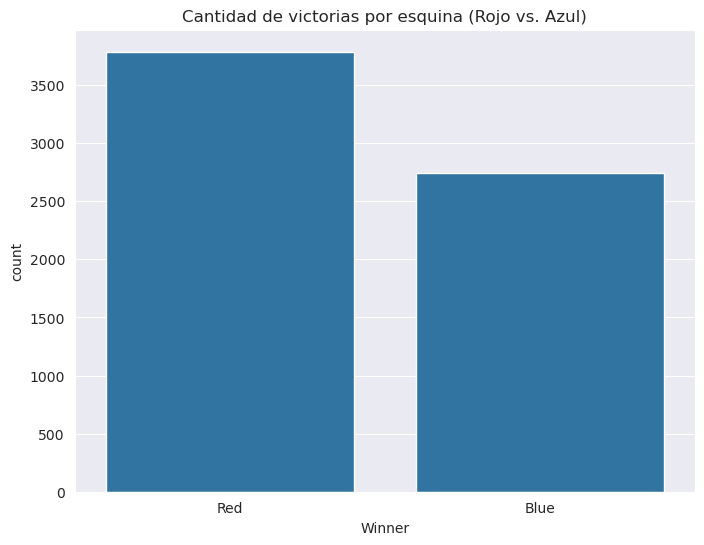

In [7]:
# Gráficos de barras para variables categóricas
plt.figure(figsize=(8, 6))
sns.countplot(x='Winner', data=ufc_data)
plt.title('Cantidad de victorias por esquina (Rojo vs. Azul)')
plt.show()

La barra correspondiente a la esquina roja es significativamente más alta que la de la esquina azul. Esto nos indica que, en el conjunto de datos analizado, los peleadores que pelean desde la esquina roja han ganado una mayor cantidad de veces.

Es importante investigar si esta diferencia se debe a que los peleadores en la esquina roja son realmente mejores, o si existen otros factores que influyen en la asignación de las esquinas. Por ejemplo, ¿se coloca en la esquina roja al peleador que se considera favorito? ¿Hay algún tipo de sesgo en la asignación de las esquinas?

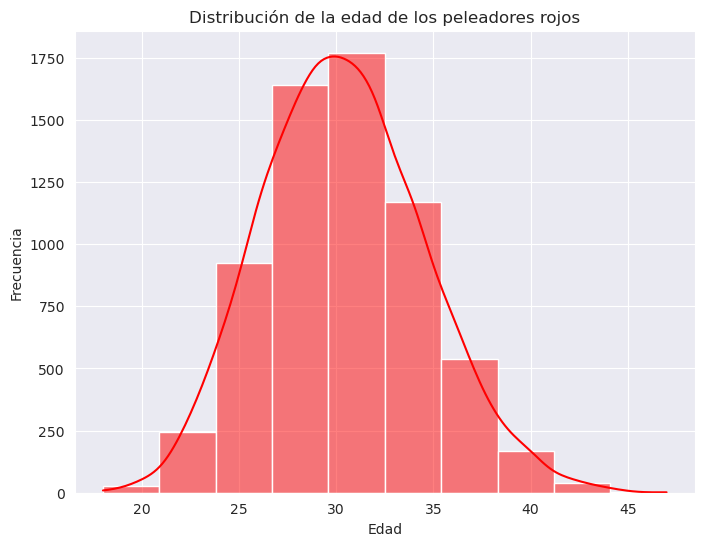

In [8]:
# 2. Histograma de la edad de los peleadores rojos
plt.figure(figsize=(8, 6))
sns.histplot(ufc_data['RedAge'], bins=10, kde=True, color='red')
plt.title('Distribución de la edad de los peleadores rojos')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

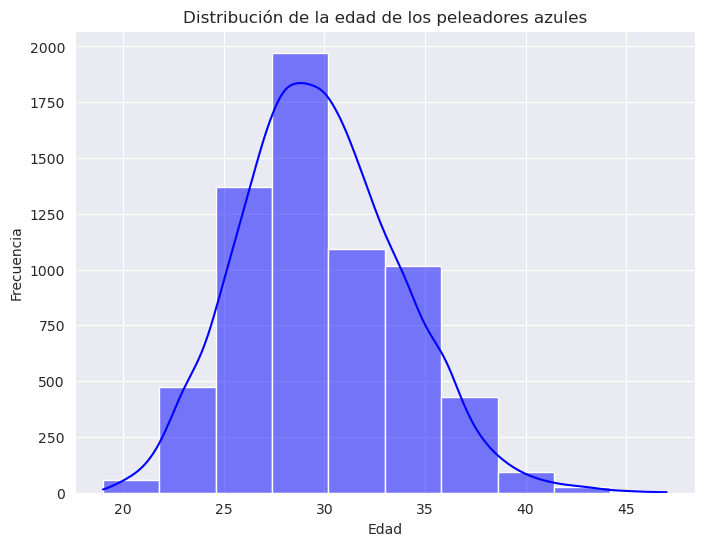

In [9]:
# 3. Histograma de la edad de los peleadores azules
plt.figure(figsize=(8, 6))
sns.histplot(ufc_data['BlueAge'], bins=10, kde=True, color='blue')
plt.title('Distribución de la edad de los peleadores azules')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [10]:
from scipy.stats import skew

# Calcular el coeficiente de asimetría de la edad de los peleadores rojos
red_age_skewness = skew(ufc_data['RedAge'])
print(f"Coeficiente de asimetría de la edad de los peleadores rojos: {red_age_skewness:.2f}")

# Calcular el coeficiente de asimetría de la edad de los peleadores azules
blue_age_skewness = skew(ufc_data['BlueAge'])
print(f"Coeficiente de asimetría de la edad de los peleadores azules: {blue_age_skewness:.2f}")

Coeficiente de asimetría de la edad de los peleadores rojos: 0.23
Coeficiente de asimetría de la edad de los peleadores azules: 0.32


Es importante recordar que la dirección del sesgo se define por la cola más larga de la distribución, no por la dirección en la que aumentan los valores en el eje horizontal.  En este caso, aunque la edad aumenta de izquierda a derecha en el histograma, el sesgo a la derecha nos indica que hay una mayor concentración de peleadores en las edades más jóvenes, y la cola se extiende hacia las edades mayores.

Con base en este análisis preliminar, podemos conjeturar que la edad de los peleadores en la UFC se distribuye de forma aproximadamente normal, con una media de alrededor de 30 años y una desviación estándar de 4 años. También podemos conjeturar que hay un ligero sesgo hacia la derecha en la distribución, lo que indica que hay más peleadores jóvenes que mayores.

# Análisis Bivariado

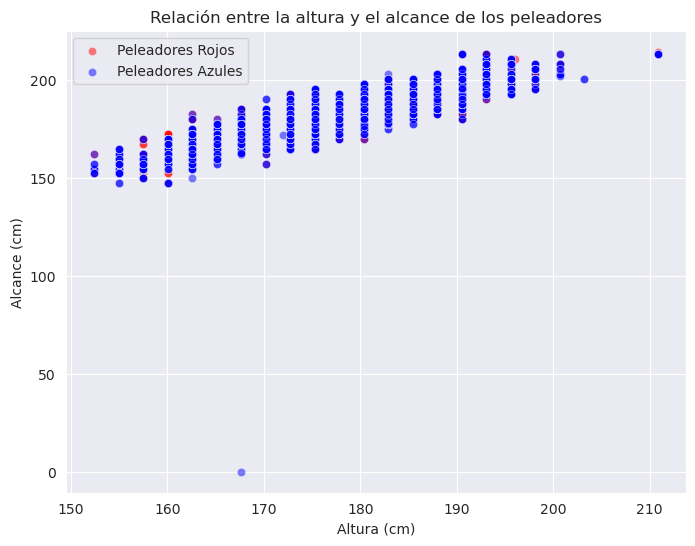

In [11]:
# 1. Scatter plot de la altura vs. el alcance de los peleadores rojos y azules
plt.figure(figsize=(8, 6))

# Scatter plot para los peleadores rojos (con alpha=0.5 para transparencia)
sns.scatterplot(x='RedHeightCms', y='RedReachCms', data=ufc_data, color='red', label='Peleadores Rojos', alpha=0.5)

# Scatter plot para los peleadores azules (con alpha=0.5 para transparencia)
sns.scatterplot(x='BlueHeightCms', y='BlueReachCms', data=ufc_data, color='blue', label='Peleadores Azules', alpha=0.5)

# Añadir título, etiquetas y leyenda
plt.title('Relación entre la altura y el alcance de los peleadores')
plt.xlabel('Altura (cm)')
plt.ylabel('Alcance (cm)')
plt.legend()

# Mostrar el gráfico
plt.show()

In [12]:
# Filtrar las filas donde 'RedReachCms' o 'BlueReachCms' sea 0
zero_reach_fighters = ufc_data[(ufc_data['RedReachCms'] == 0) | (ufc_data['BlueReachCms'] == 0)]

# Mostrar los peleadores con alcance 0
if not zero_reach_fighters.empty:
    print("Peleadores con alcance 0:")
    print(zero_reach_fighters[['RedFighter', 'BlueFighter', 'Date']].to_markdown(index=False, numalign="left", stralign="left"))  # Mostrar solo las columnas relevantes
else:
    print("No se encontraron peleadores con alcance 0.")

Peleadores con alcance 0:
| RedFighter    | BlueFighter   | Date       |
|:--------------|:--------------|:-----------|
| Giga Chikadze | Irwin Rivera  | 2020-05-16 |


Se observa una clara correlación positiva entre la altura y el alcance para ambos grupos de peleadores. Esto significa que, en general, los peleadores más altos tienden a tener un mayor alcance de brazos.

La relación entre la altura y el alcance parece ser muy similar para los peleadores rojos y azules, ya que los puntos de ambos grupos se distribuyen de forma similar en el gráfico. Esto sugiere que no hay una diferencia significativa en la relación entre estas variables entre los dos grupos.

Se pueden observar algunos valores atípicos, es decir, peleadores que se alejan de la tendencia general. Por ejemplo, hay un peleador con una altura cercana a 160 cm y un alcance de casi 180 cm, lo cual es inusual.

La mayor densidad de puntos se encuentra en la zona central del gráfico, lo que indica que la mayoría de los peleadores tienen una altura y un alcance promedio.

In [13]:
# 2. Calcular la correlación entre la altura y el alcance de los peleadores rojos
correlation_red = ufc_data['RedHeightCms'].corr(ufc_data['RedReachCms'])
print(f"Correlación entre la altura y el alcance de los peleadores rojos: {correlation_red:.2f}")

# Calcular la correlación entre la altura y el alcance de los peleadores azules
correlation_blue = ufc_data['BlueHeightCms'].corr(ufc_data['BlueReachCms'])
print(f"Correlación entre la altura y el alcance de los peleadores azules: {correlation_blue:.2f}")

Correlación entre la altura y el alcance de los peleadores rojos: 0.90
Correlación entre la altura y el alcance de los peleadores azules: 0.88


**Correlación positiva fuerte**:  Estos valores indican una correlación positiva fuerte entre la altura y el alcance en ambos grupos de peleadores. Esto significa que, en general, a medida que aumenta la altura de un peleador, también tiende a aumentar su alcance.

**Similitud entre grupos**: La correlación es muy similar en ambos grupos, lo cual sugiere que la relación entre la altura y el alcance es consistente independientemente de la esquina en la que se encuentre el peleador.

**Valores cercanos a 1**:  Los valores de correlación de 0.90 y 0.88 son cercanos a 1, lo que indica una relación lineal fuerte.  Esto significa que la altura y el alcance tienden a aumentar de forma proporcional.

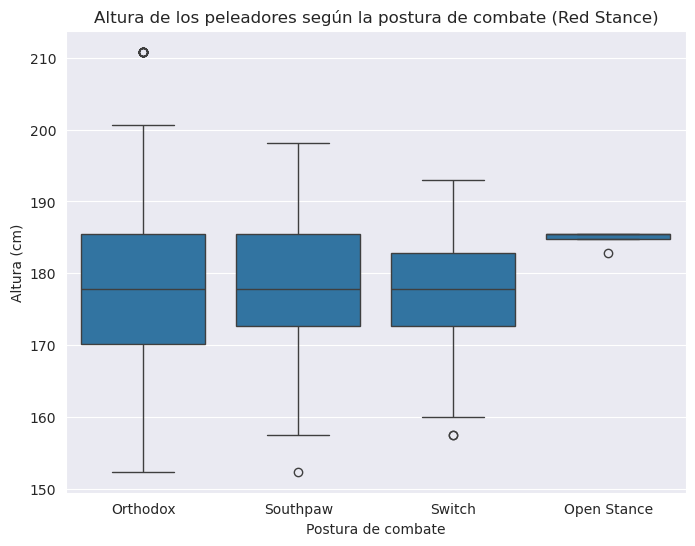

In [14]:
# 3. Boxplot de la altura según la postura de combate (Red Stance)
plt.figure(figsize=(8, 6))
sns.boxplot(x='RedStance', y='RedHeightCms', data=ufc_data)
plt.title('Altura de los peleadores según la postura de combate (Red Stance)')
plt.xlabel('Postura de combate')
plt.ylabel('Altura (cm)')
plt.show()

## Análisis Multivariado

In [15]:
# 4. Tabla de contingencia de la postura de combate (Red Stance) vs. el método de finalización de la pelea (Finish)
contingency_table = pd.crosstab(ufc_data['RedStance'], ufc_data['Finish'])
print("Tabla de contingencia de la postura de combate vs. el método de finalización:")
print(contingency_table.to_markdown(numalign="left", stralign="left"))

Tabla de contingencia de la postura de combate vs. el método de finalización:
| RedStance   | DQ   | KO/TKO   | M-DEC   | Overturned   | S-DEC   | SUB   | U-DEC   |
|:------------|:-----|:---------|:--------|:-------------|:--------|:------|:--------|
| Open Stance | 0    | 3        | 0       | 0            | 0       | 0     | 1       |
| Orthodox    | 11   | 1501     | 36      | 1            | 492     | 840   | 1816    |
| Southpaw    | 6    | 380      | 9       | 1            | 132     | 239   | 459     |
| Switch      | 1    | 125      | 1       | 0            | 30      | 78    | 128     |


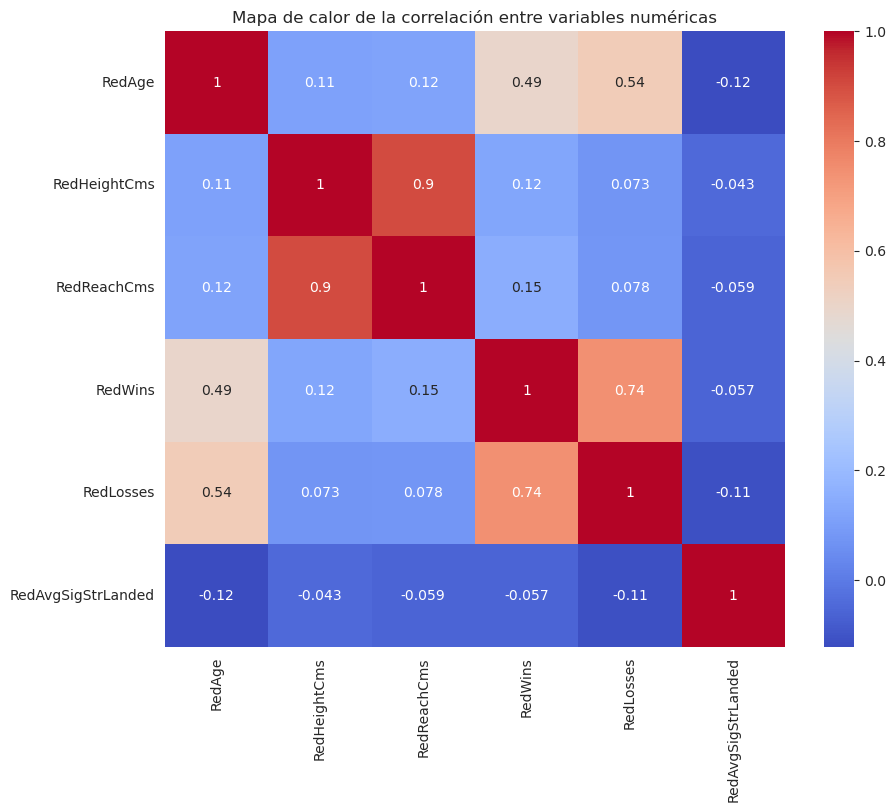

In [16]:
# 5. Mapa de calor de la correlación entre variables numéricas
numerical_vars = ['RedAge', 'RedHeightCms', 'RedReachCms', 'RedWins', 'RedLosses', 'RedAvgSigStrLanded']
correlation_matrix = ufc_data[numerical_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de la correlación entre variables numéricas')
plt.show()

El análisis bivariado que acabamos de realizar con el dataset de la UFC, aunque en un contexto deportivo, tiene aplicaciones directas en la actuaría.  Nos permite comprender la relación entre dos variables, lo cual es fundamental para la evaluación de riesgos, la tarificación de seguros y la toma de decisiones.

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- Análisis de Componentes Principales (PCA) ---

# Seleccionar las variables numéricas para el PCA
numerical_vars = ['RedAge', 'RedHeightCms', 'RedReachCms', 'RedWins', 'RedLosses', 'RedAvgSigStrLanded']
pca_data = ufc_data[numerical_vars].dropna()  # Eliminar filas con valores faltantes

# Estandarizar las variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data)

# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 componentes principales
principal_components = pca.fit_transform(scaled_data)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Añadir la variable 'Winner' al DataFrame
pca_df['Winner'] = ufc_data.loc[pca_data.index, 'Winner']

# Visualizar los componentes principales con un scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Winner', data=pca_df, alpha=0.5)
plt.title('Dos primeros componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

ModuleNotFoundError: No module named 'sklearn'

In [18]:
print(pca.explained_variance_ratio_)

[0.39289418 0.29045657]


Como la varianza explicada por PC1 y PC2 es baja (menos del 50%), esto significa que hay otros componentes principales que capturan información importante sobre la variabilidad de los datos.  En este caso, sería necesario analizar más componentes para obtener una mejor comprensión de la estructura de los datos.

In [20]:
print(pca.components_)
# RedAge', 'RedHeightCms', 'RedReachCms', 'RedWins', 'RedLosses', 'RedAvgSigStrLanded

[[ 0.45321304  0.36104663  0.36945151  0.50952908  0.50123975 -0.12995264]
 [-0.25454837  0.60700807  0.60073955 -0.28571972 -0.35092677  0.03275623]]


La magnitud de cada peso indica la importancia de la variable en la construcción del componente principal. Un peso mayor (en valor absoluto) significa que la variable tiene una mayor influencia en el componente. El signo del peso indica la dirección de la relación. Un peso positivo significa que la variable está positivamente correlacionada con el componente, mientras que un peso negativo significa que la variable está negativamente correlacionada con el componente.

+ **PC1**:  Las variables `RedWins` (0.5095) y `RedLosses` (0.5012) tienen los pesos más altos en PC1, lo que sugiere que este componente está fuertemente relacionado con la experiencia del peleador (más victorias y derrotas indican más experiencia).  La variable `RedAge` (0.4532) también tiene un peso alto, lo que indica que la edad también está relacionada con este componente.  El peso negativo de `RedAvgSigStrLanded` (-0.1299) sugiere que este componente está inversamente relacionado con la cantidad de golpes significativos conectados.

+ **PC2**:  Las variables `RedHeightCms` (0.6070) y `RedReachCms` (0.6007) tienen los pesos más altos en PC2, lo que indica que este componente está fuertemente relacionado con el tamaño físico del peleador.

# Actividad

Análisis Univariado de variables del dataset UFC

Objetivo:

Aplicar el análisis univariado para explorar y comprender la distribución de diferentes variables del dataset de la UFC, incluyendo variables numéricas y categóricas.

**Instrucciones**:

1. **Seleccionar variables**:  Cada estudiante (o grupo de estudiantes) seleccionará una variable numérica y una variable categórica del dataset de la UFC.

2. **Análisis univariado de la variable numérica:**

+ Calcular las estadísticas descriptivas de la variable (media, mediana, desviación estándar, mínimo, máximo, cuartiles, etc.).
+ Crear un histograma para visualizar la distribución de la variable.
+ Describir la forma de la distribución, identificar posibles valores atípicos y cualquier otro patrón relevante.

3. **Análisis univariado de la variable categórica**:

+ Calcular la frecuencia de cada categoría.
+ Crear un gráfico de barras para visualizar las frecuencias.
+ Describir la distribución de las categorías e identificar la categoría más frecuente.

4. **Interpretación**:

+ Interpretar los resultados del análisis univariado en el contexto del dataset de la UFC.
+ Explicar qué significa un valor alto o bajo en la variable numérica.
+ Explicar qué significa la frecuencia de cada categoría en la variable categórica.

5. Presentación:

+ Presentar los resultados del análisis univariado al resto de la clase, incluyendo las estadísticas descriptivas, las visualizaciones y las interpretaciones.

1. Selección de variables

Numérica: RedWins

Categórica: RedStance

In [4]:
ufc_data

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Alexandre Pantoja,Kai Asakura,-250.0,215.0,40.0000,215.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Rear Naked Choke,2.0,2:05,425.0,300.0,800.0,150.0,2500.0,400.0,350.0
1,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,47.6190,295.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,NaN,5.0,5:00,1500.0,250.0,650.0,180.0,3000.0,240.0,700.0
2,Ciryl Gane,Alexander Volkov,-380.0,300.0,26.3158,300.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,NaN,3.0,5:00,900.0,-160.0,450.0,1100.0,3000.0,350.0,1100.0
3,Bryce Mitchell,Kron Gracie,-950.0,625.0,10.5263,625.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Elbows,3.0,0:39,639.0,-200.0,1100.0,380.0,1400.0,500.0,4000.0
4,Nate Landwehr,Dooho Choi,-130.0,110.0,76.9231,110.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Blue,...,Elbows,3.0,3:21,801.0,275.0,550.0,500.0,700.0,300.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,Duane Ludwig,Darren Elkins,-155.0,135.0,64.5161,135.0,2010-03-21,"Broomfield, Colorado, USA",USA,Blue,...,NaN,1.0,0:44,44.0,NaN,NaN,NaN,NaN,NaN,NaN
6524,John Howard,Daniel Roberts,-210.0,175.0,47.6190,175.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,Punch,1.0,2:01,121.0,NaN,NaN,NaN,NaN,NaN,NaN
6525,Brendan Schaub,Chase Gormley,-260.0,220.0,38.4615,220.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,Punches,1.0,0:47,47.0,NaN,NaN,NaN,NaN,NaN,NaN
6526,Mike Pierce,Julio Paulino,-420.0,335.0,23.8095,335.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,NaN,3.0,5:00,900.0,NaN,NaN,NaN,NaN,NaN,NaN


2. Análisis univariado de la variable numérica

In [3]:
# Estadísticas descriptivas de la variable
ufc_data['RedWins'].describe()

count    6528.000000
mean        4.628064
std         4.505498
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        33.000000
Name: RedWins, dtype: float64

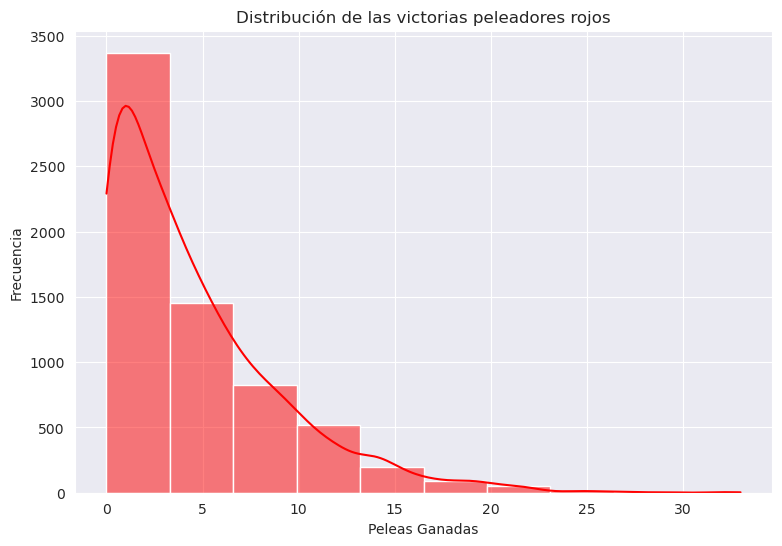

In [5]:
# Histograma
plt.figure(figsize=(9, 6))
sns.histplot(ufc_data.RedWins, bins=10, kde=True, color='red')
plt.title('Distribución de las victorias peleadores rojos')
plt.xlabel('Peleas Ganadas')
plt.ylabel('Frecuencia')
plt.show()

El histograma de muestra una distribución asimétrica hacia la derecha (sesgada a la derecha). Se asemeja a una distribución Poisson o una distribución Gamma, ya que los valores están concentrados en los números pequeños y hay una cola larga hacia valores más altos.

* La mayoría de los peleadores rojos tienen menos de 10 victorias
* Hay pocos peleadores que tienen más de 10 victorias


3. Análisis de la variable categórica

In [34]:
# Frecuencia de RedStance
ufc_data.RedStance.value_counts()

RedStance
Orthodox       4877
Southpaw       1276
Switch          371
Open Stance       4
Name: count, dtype: int64

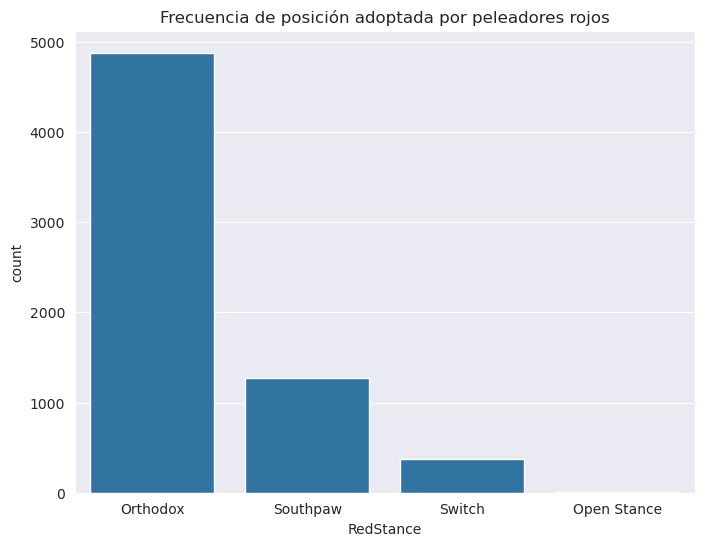

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='RedStance', data=ufc_data)
plt.title('Frecuencia de posición adoptada por peleadores rojos')
plt.show()

* La posición Ortodoxa es la más utilizada por los peleadores rojos. Esto sugiere que la mayoría son diestros, ya que esta postura coloca la mano fuerte en la parte trasera para generar más potencia en los golpes.
* Un grupo más pequeño de peleadores utiliza la postura Southpaw, lo que indica que hay menos peleadores zurdos o que prefieren esta postura.
* La postura sigue una distribución categórica o discreta multinomial, ya que representa conteos de diferentes categorías de una variable cualitativa.

## Interpretación






* Es muy frecuente que un peleador rojo tenga menos de 10 victorias en su carrera
* La posición Ortodoxa es la más usada por los peleadores rojos, la menos usada es Switch
La frecuencia en una variable categórica indica que tantas veces se repite la variable en un conjunto de datos. En este caso la posición es la variable categórica
Un valor alto en una variable numérica tendrá interpretación depende el contexto, en este caso, las victorias, un número alto, mayor victorias
